C:\Users\Okamura\AppData\Local\Temp\ipykernel_58104\4162561562.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


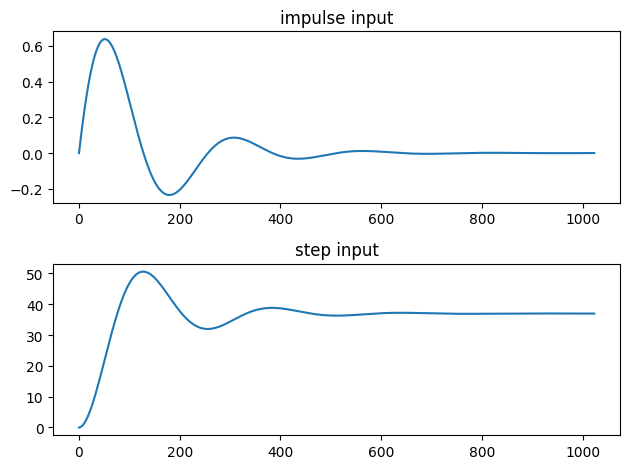

In [5]:
import numpy as np
import matplotlib.pyplot as plt 


def x(n):
    if(n==0): return(1.0)
    else:return(0.0)

def g(n):
    z=np.exp(-n/128.)*np.sin(2*np.pi*n/256.)
    return z

def s(n):
    if(n>=0):return(1.0)
    else:return(0.0)

y=np.zeros(1024)
y2=np.zeros(1024)
for n in range(1024):
    for m in range(n):
        y[n]=y[n]+g(n-m)*x(m)
        y2[n]=y2[n]+g(n-m)*s(m)
fig=plt.figure()
ax1=fig.add_subplot(2,1,1)
ax1.set_title('impulse input')
ax1.plot(y)
ax2=fig.add_subplot(2,1,2)
ax2.set_title('step input')
ax2.plot(y2)
fig.tight_layout()
fig.show()
fig.savefig('impulse.pdf')




C:\Users\Okamura\AppData\Local\Temp\ipykernel_58104\2997786435.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


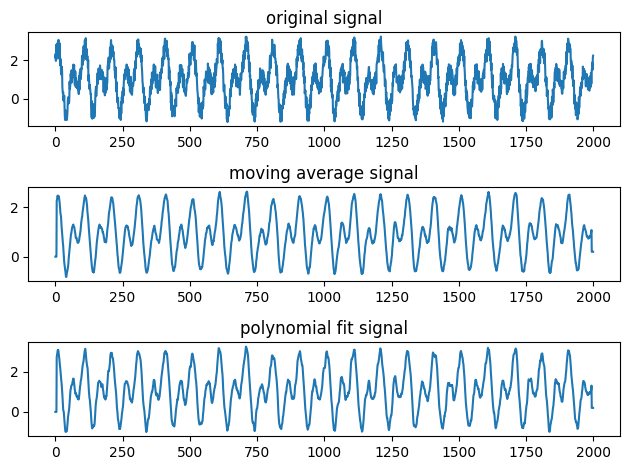

In [6]:

t=np.linspace(0,0.2,2000)
y=np.linspace(0,0.2,2000)
w=np.linspace(0,0.2,2000)
U=np.random.rand(2000)-0.5
signal=np.sin(400*np.pi*t)+np.cos(200*np.pi*t)+1+U
m=5
M=11.0
wj=1.0
W=(4*m*m-1)*(2*m+3)/3
for n in range(m,len(t)-m-1,1):
    for j in range(-m,m,1):
        y[n]+=signal[n+j]
        wj=(3*m*(m+1)-1-5*j*j)
        w[n]+=signal[n+j]*wj
    y[n]=y[n]/M
    w[n]=w[n]/W
fig=plt.figure()
ax1=fig.add_subplot(3,1,1)
ax1.set_title('original signal')
ax1.plot(signal)
ax2=fig.add_subplot(3,1,2)
ax2.set_title('moving average signal')
ax2.plot(y)
ax3=fig.add_subplot(3,1,3)
ax3.set_title('polynomial fit signal')
ax3.plot(w)
fig.tight_layout()
fig.show()
fig.savefig('moving_average.pdf')


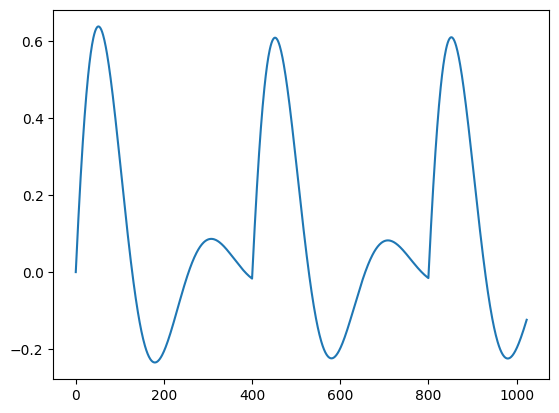

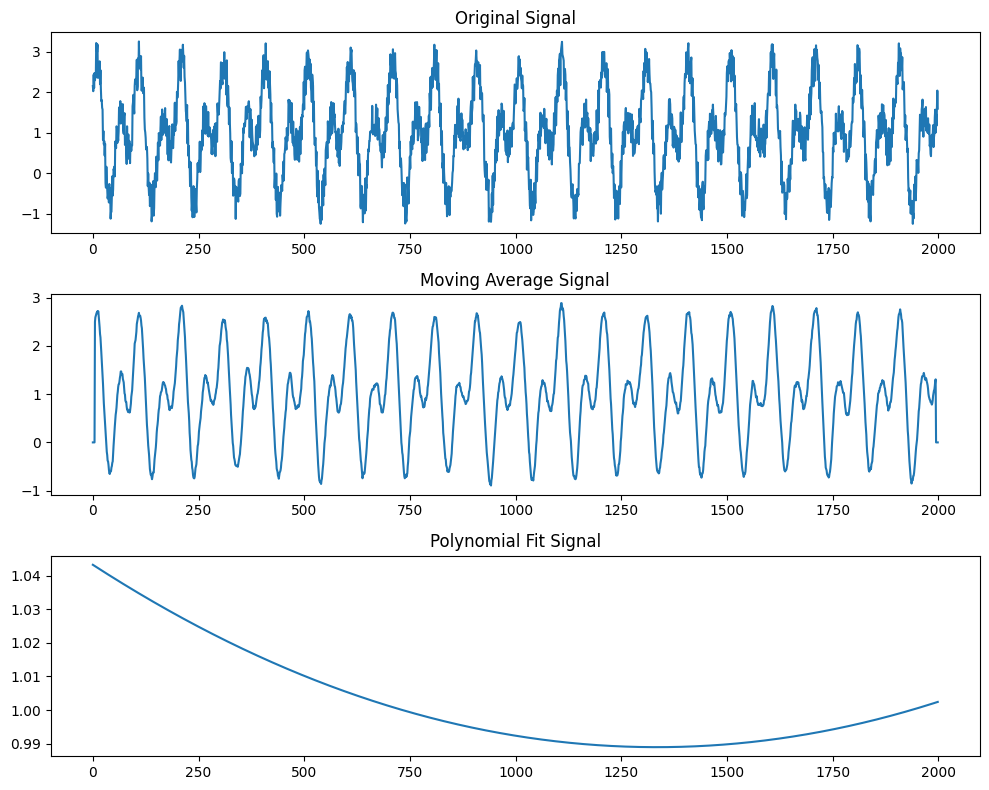

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def x(n):
    return 1.0 if n % 400 == 0 else 0.0

def g(n):
    return np.exp(-n / 128.0) * np.sin(2 * np.pi * n / 256.0)

def compute_convolution():
    y = np.zeros(1024)
    for n in range(1024):
        for m in range(n):
            y[n] += g(n - m) * x(m)
    return y

def moving_average(signal, m):
    y = np.zeros_like(signal)
    M = 2 * m + 1
    for n in range(m, len(signal) - m):
        y[n] = np.sum(signal[n - m:n + m + 1]) / M
    return y

def polynomial_fit(signal, t, degree=2):
    coefficients = np.polyfit(t,signal,degree)
    poly_fit=np.polyval(coefficients,t)
    return poly_fit

def plot_signals(signal, moving_avg, poly_fit):
    fig, axs = plt.subplots(3, 1, figsize=(10, 8))
    
    axs[0].set_title('Original Signal')
    axs[0].plot(signal)
    
    axs[1].set_title('Moving Average Signal')
    axs[1].plot(moving_avg)
    
    axs[2].set_title('Polynomial Fit Signal')
    axs[2].plot(poly_fit)
    
    fig.tight_layout()
    plt.show()
    fig.savefig('signals.pdf')

# メイン処理
if __name__ == "__main__":
    # インパルス応答の計算とプロット
    y = compute_convolution()
    plt.plot(y)
    plt.savefig('impulse.pdf')
    plt.show()

    # 信号の生成
    t = np.linspace(0, 0.2, 2000)
    U = np.random.rand(2000) - 0.5
    signal = np.sin(400 * np.pi * t) + np.cos(200 * np.pi * t) + 1 + U

    # 移動平均の計算
    m = 5
    moving_avg = moving_average(signal, m)

    # 2次多項式適合の計算
    poly_fit = polynomial_fit(signal, t)

    # 信号のプロット
    plot_signals(signal, moving_avg, poly_fit)

0.21366666666666667 0.0009199999999999997


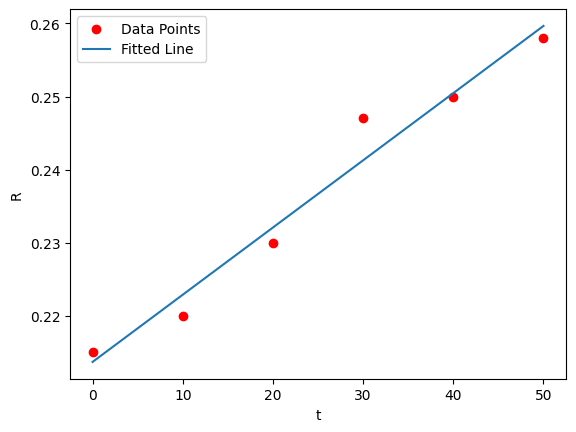

In [8]:
R=np.array([0.215,0.220,0.230,0.247,0.250,0.258])
rho1=rho2=x=y=0.0

for t in range(0,60,10):
    rho1+=R[t//10]*t
    rho2+=t*t
    x+=t
    y+=R[t//10]
a0=(y*rho2-x*rho1)/(6*rho2-x*x)
a1=(6*rho1-x*y)/(6*rho2-x*x)
print(a0,a1)

# データ点の散布図を表示
t_values = np.arange(0, 60, 10)
plt.scatter(t_values, R, color='red', label='Data Points')

# 直線を表示
plt.plot([0, 50], [a0, a0 + a1 * 50], label='Fitted Line')

plt.xlabel('t')
plt.ylabel('R')
plt.legend()
plt.show()

-0.0 0.6225978538431338


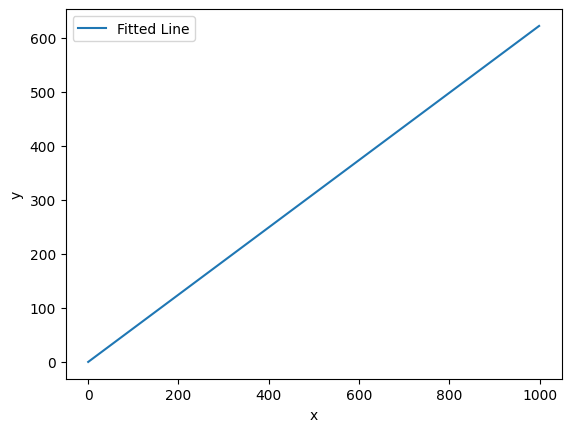

In [9]:
G=np.array([1.0,-0.9,0.8,-0.7,0.6])
rng = np.random.default_rng()
x=rng.standard_normal(1000)
y=np.zeros(1000)
sigma=rng.standard_normal(1000) / 20

for n in range(0,len(x)):
    for m in range(0,len(G)):
        if(n-m<0):y[n]+=0
        else:y[n]+=x[n-m]*G[m]
    y[n]+=sigma[n]

rhoa = rhob = xbar = ybar = 0.0
for n in range(0,len(x)):
    rho1+=y[n]*x[n]
    rho2+=x[n]*x[n]
    xbar+=x[n]
    ybar+=y[n]
rhoa=rhoa/len(x)
rhob/=len(x)
xbar/=len(x)
ybar/=len(x)
b0=(ybar*rhob-xbar*rhoa)/(rhob-xbar*xbar)
b1=(rhoa-xbar*ybar)/(rhob-xbar*xbar)
print(b0,b1)
t=np.arange(0,1000)
line=b0+b1*t
# 直線を表示
plt.plot(t,line,label='Fitted Line')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


[ 0.99957498 -0.89997024  0.80049787 -0.70070563  0.60008968]
[ 4.25021589e-04 -2.97634571e-05 -4.97874161e-04  7.05630647e-04
 -8.96758516e-05]


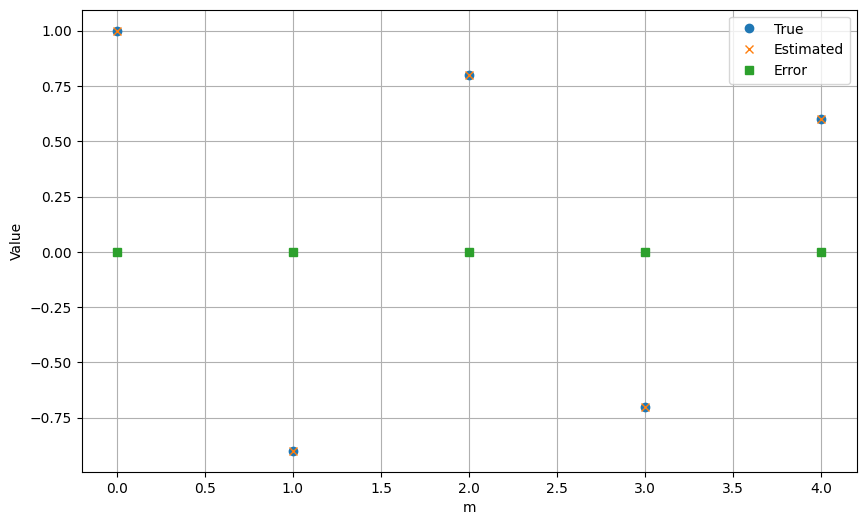

In [10]:
import numpy as np
import matplotlib.pyplot as plt

N = 5
g_true = np.array([1, -0.9, 0.8, -0.7, 0.6])
x = np.random.normal(0, 1, 1000)
epsilon = np.random.normal(0, 1/20, 1000)

y = np.zeros_like(x)
for n in range(N, len(x)):
    y[n] = np.dot(g_true, x[n-N:n][::-1]) + epsilon[n]

X = np.zeros((len(x) - N, N))
for n in range(N, len(x)):
    X[n-N] = x[n-N:n][::-1]
y_trimmed = y[N:]

g_estimated = np.linalg.lstsq(X, y_trimmed, rcond=None)[0]

print(g_estimated)

error = g_true - g_estimated
print(error)
plt.figure(figsize=(10, 6))
plt.plot(g_true, 'o', label='True')
plt.plot(g_estimated, 'x', label='Estimated')
plt.plot(error, 's', label='Error') 
plt.xlabel('m')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.savefig('LS1.pdf')
plt.show()



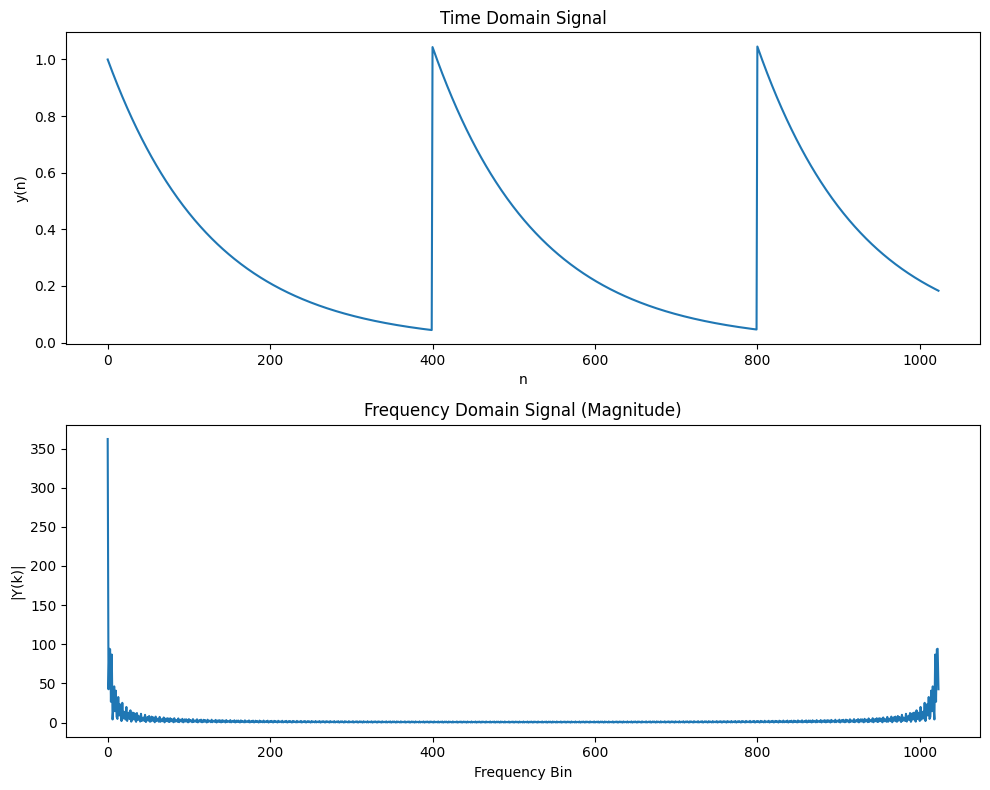

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# インパルス応答 g(n) の定義
def g(n):
    return np.exp(-n / 128.0)

# 入力 x(m) の定義
def x(m):
    return 1.0 if m % 400 == 0 else 0.0

# 畳み込みの計算
N = 1024
y = np.zeros(N)
for n in range(N):
    for m in range(N):
        if n - m >= 0:
            y[n] += g(n - m) * x(m)

# DFTの計算
Y = np.fft.fft(y)

# 結果のプロット
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# 時間領域の信号
axs[0].set_title('Time Domain Signal')
axs[0].plot(y)
axs[0].set_xlabel('n')
axs[0].set_ylabel('y(n)')

# 周波数領域の信号
axs[1].set_title('Frequency Domain Signal (Magnitude)')
axs[1].plot(np.abs(Y))
axs[1].set_xlabel('Frequency Bin')
axs[1].set_ylabel('|Y(k)|')

fig.tight_layout()
fig.savefig("impulse_dft.pdf")
plt.show()

C:\Users\Okamura\AppData\Local\Temp\ipykernel_52200\3985020900.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  x_estimated[n] += y[n - m] / g[m]
C:\Users\Okamura\AppData\Local\Temp\ipykernel_52200\3985020900.py:35: RuntimeWarning: invalid value encountered in scalar add
  x_estimated[n] += y[n - m] / g[m]


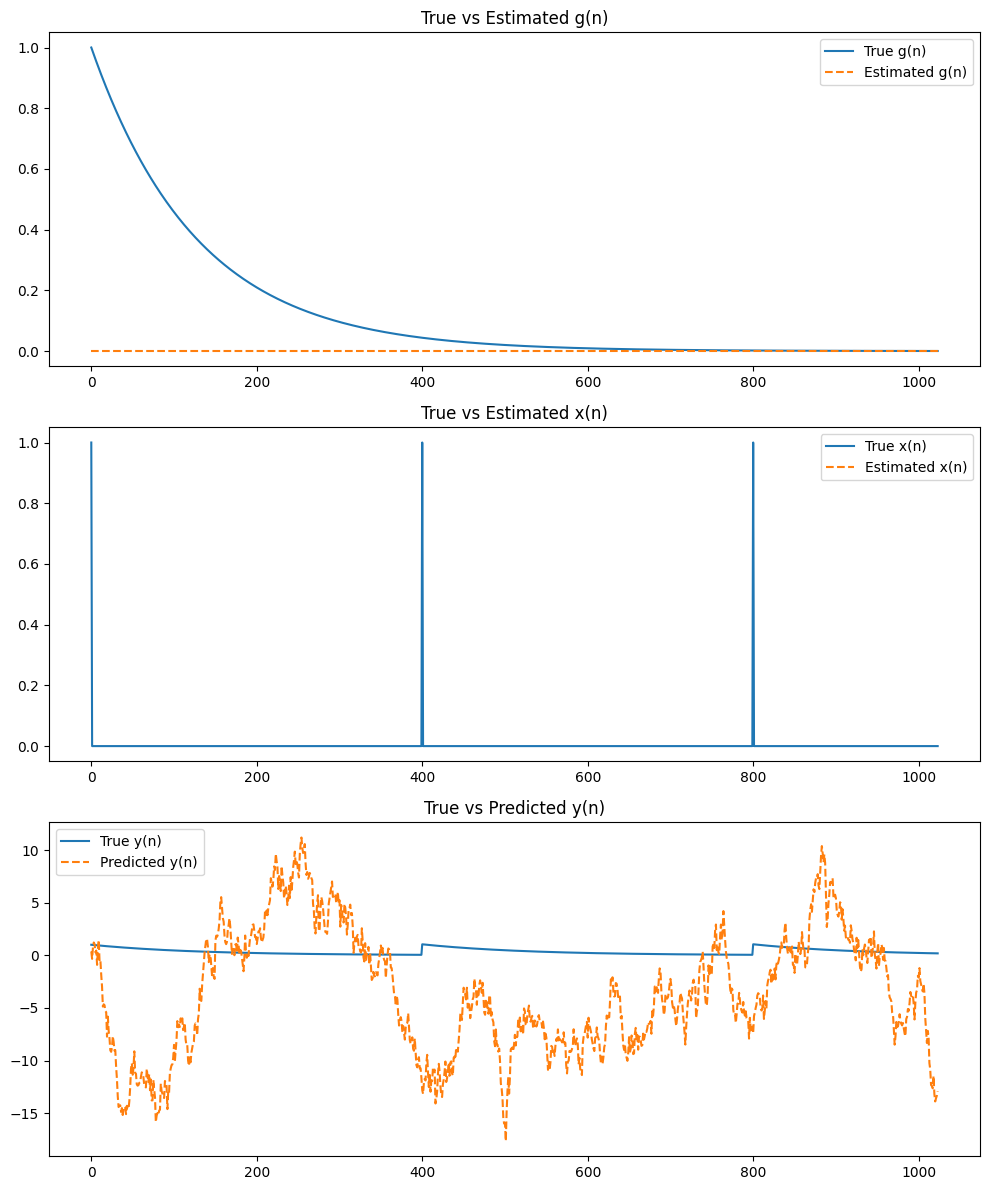

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 真値の定義
def true_g(n):
    return np.exp(-n / 128.0)

def true_x(m):
    return 1.0 if m % 400 == 0 else 0.0

# 出力応答の予測
def predict_output(N):
    y = np.zeros(N)
    for n in range(N):
        for m in range(N):
            if n - m >= 0:
                y[n] += true_g(n - m) * true_x(m)
    return y

# システム同定
def system_identification(x, y, N):
    X = np.zeros((len(x) - N, N))
    for n in range(N, len(x)):
        X[n - N] = x[n - N:n][::-1]
    y_trimmed = y[N:]
    g_estimated = np.linalg.lstsq(X, y_trimmed, rcond=None)[0]
    return g_estimated

# 逆畳込み
def inverse_convolution(y, g, N):
    x_estimated = np.zeros(N)
    for n in range(N):
        for m in range(N):
            if n - m >= 0:
                x_estimated[n] += y[n - m] / g[m]
    return x_estimated

# メイン処理
if __name__ == "__main__":
    N = 1024

    # 真値の計算
    y_true = predict_output(N)
    g_true = np.array([true_g(n) for n in range(N)])
    x_true = np.array([true_x(m) for m in range(N)])

    # システム同定
    x = np.random.normal(0, 1, N)
    epsilon = np.random.normal(0, 1/20, N)
    y = np.zeros_like(x)
    for n in range(N):
        for m in range(N):
            if n - m >= 0:
                y[n] += g_true[m] * x[n - m]
        y[n] += epsilon[n]

    g_estimated = system_identification(x, y, N)

    # 逆畳込み
    x_estimated = inverse_convolution(y, g_estimated, N)

    # 結果のプロット
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    axs[0].set_title('True vs Estimated g(n)')
    axs[0].plot(g_true, label='True g(n)')
    axs[0].plot(g_estimated, label='Estimated g(n)', linestyle='dashed')
    axs[0].legend()

    axs[1].set_title('True vs Estimated x(n)')
    axs[1].plot(x_true, label='True x(n)')
    axs[1].plot(x_estimated, label='Estimated x(n)', linestyle='dashed')
    axs[1].legend()

    axs[2].set_title('True vs Predicted y(n)')
    axs[2].plot(y_true, label='True y(n)')
    axs[2].plot(y, label='Predicted y(n)', linestyle='dashed')
    axs[2].legend()

    fig.tight_layout()
    plt.savefig('comparison.pdf')
    plt.show()

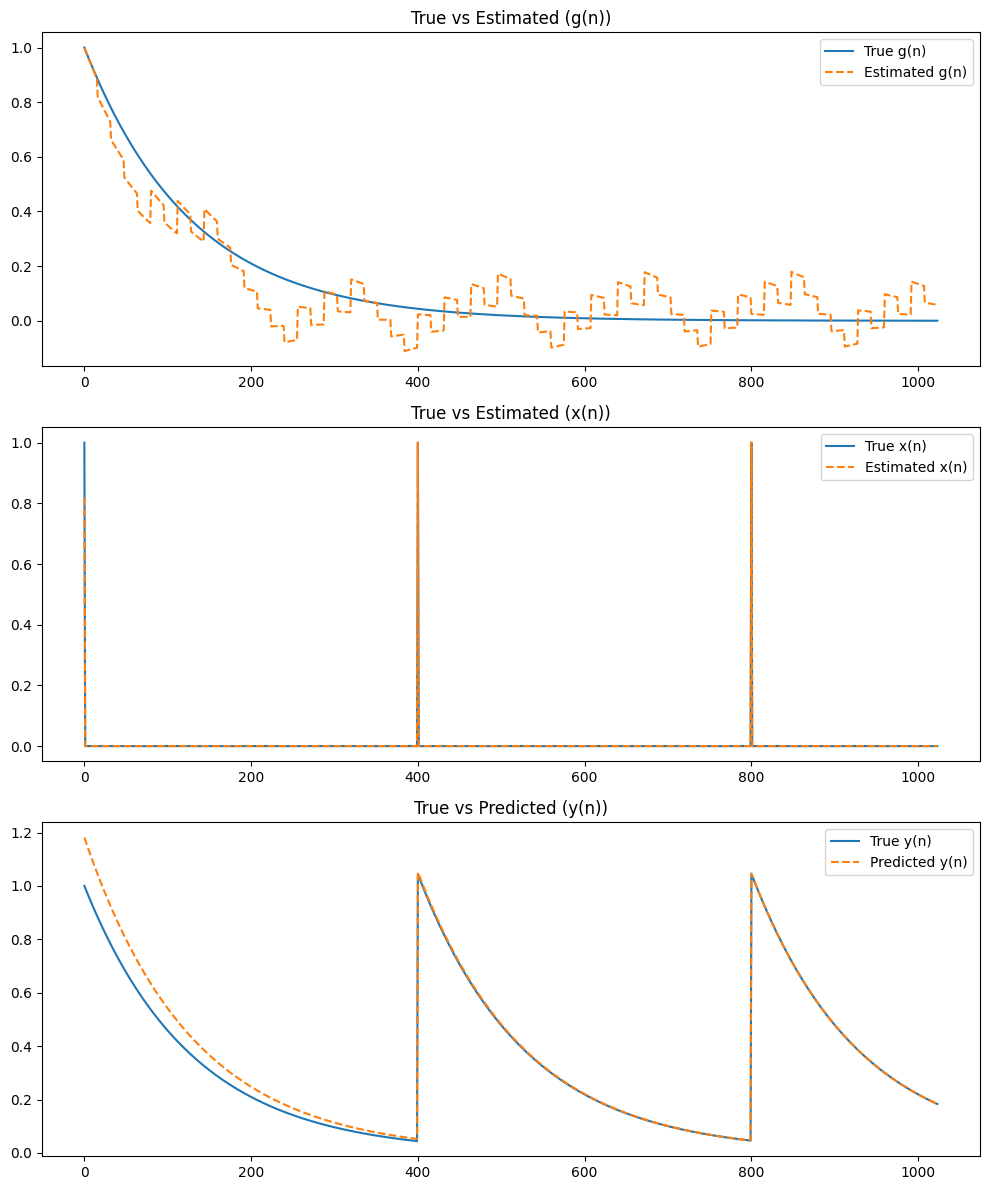

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 真値の定義
def true_g(n):
    return np.exp(-n / 128.0)

def true_x(m):
    return 1.0 if m % 400 == 0 else 0.0

# 出力応答の予測
def predict_output(x,g,N):
    G = np.fft.fft(g)
    X = np.fft.fft(x)
    Y_estimated = G * X
    y_estimated = np.fft.ifft(Y_estimated).real
    return y_estimated

# システム同定
def system_identification(x, y, N):
    X = np.fft.fft(x)
    Y = np.fft.fft(y)
    G_estimated = Y / X
    g_estimated = np.fft.ifft(G_estimated).real[:N]
    return g_estimated

# 逆畳込み
def inverse_convolution(y, g, N):
    Y = np.fft.fft(y)
    G = np.fft.fft(g)
    X_estimated = Y / G
    x_estimated = np.fft.ifft(X_estimated).real[:N]
    return x_estimated

# メイン処理
if __name__ == "__main__":
    N = 1024

    # 真値の計算
    g_true = np.array([true_g(n) for n in range(N)])
    x_true = np.array([true_x(m) for m in range(N)])

    y_true = np.zeros_like(x)
    for n in range(N):
        for m in range(N):
            if n - m >= 0:
                y_true[n] += g_true[m] * x_true[n - m]
       
    y_estimated = predict_output(x_true, g_true, N)
    g_estimated = system_identification(x_true, y_true, N)
    x_estimated = inverse_convolution(y_true, g_true, N)

    fig, axs = plt.subplots(3, 1, figsize=(10, 12))

    axs[0].set_title('True vs Estimated (g(n))')
    axs[0].plot(g_true, label='True g(n)')
    axs[0].plot(g_estimated, label='Estimated g(n)', linestyle='dashed')
    axs[0].legend()

    axs[1].set_title('True vs Estimated (x(n))')
    axs[1].plot(x_true, label='True x(n)')
    axs[1].plot(x_estimated, label='Estimated x(n)', linestyle='dashed')
    axs[1].legend()

    axs[2].set_title('True vs Predicted (y(n))')
    axs[2].plot(y_true, label='True y(n)')
    axs[2].plot(y_estimated, label='Predicted y(n)', linestyle='dashed')
    axs[2].legend()

    fig.tight_layout()
    plt.savefig('comparison.pdf')
    plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def input(x):
    if(x/400==0):return 1
    else:return 0

N=1024
g=np.zeros(N)
y=np.zeros_like(g)
for n in range(0,N):
    g[n]=np.exp((-1)*n/128.0)
for m in range(0,N-1):
    y[n]=np.dot(g[::-1],input(n))

y=np.fft.fft(y)

print(y)



ValueError: setting an array element with a sequence.